In [1]:
# 목적 : kaggle 필사를 통한 데이터 분석 및 시각화 실습
# 출처 : https://www.kaggle.com/code/snanilim/video-games-sales-analysis-and-visualization/notebook

In [2]:
# 데이터셋 다운로드
# kaggle token이 필요하고 pip install kaggle을 통해 kaggle api를 설치해야 한다.
import os
import shutil

if not os.path.exists('data/videogamesales.zip'):
    os.system("kaggle datasets download -d gregorut/videogamesales")
    shutil.move('videogamesales.zip', 'data/videogamesales.zip')
    shutil.unpack_archive('data/videogamesales.zip', 'data')

In [3]:
# 모듈 import
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

In [4]:
data = pd.read_csv('data/vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# 2016이전 데이터만 추출 
drop_row_index = data[data["Year"] > 2015].index
data = data.drop(drop_row_index)

In [6]:
data.shape

(16250, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Their fidlds and data types are:**

- Rank - Ranking of overall sales, integer  
- Name - The games name  
- Platform - Platform of the games release(i.e PC,PS4,etc.), object 
- Year - Year of the game's release, float  
- Genre - Genre of the game, object  
- Publisher - Publisher of the game. object  
- NA_Sales - Sales in North Americal(in millions), float  
- EU_Sales - Sales in Europe(in millions), float  
- JP_Sales - Sales in Japan(in millions), float  
- Other_Sales - Sales in the rest of the world(in millions), float  
- Global_Sales - Total woridwide salse, float  

In [8]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [9]:
data.describe(include=['object', 'bool'])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [10]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## 1.What genre games have been made the most?

In [11]:
data['Genre'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

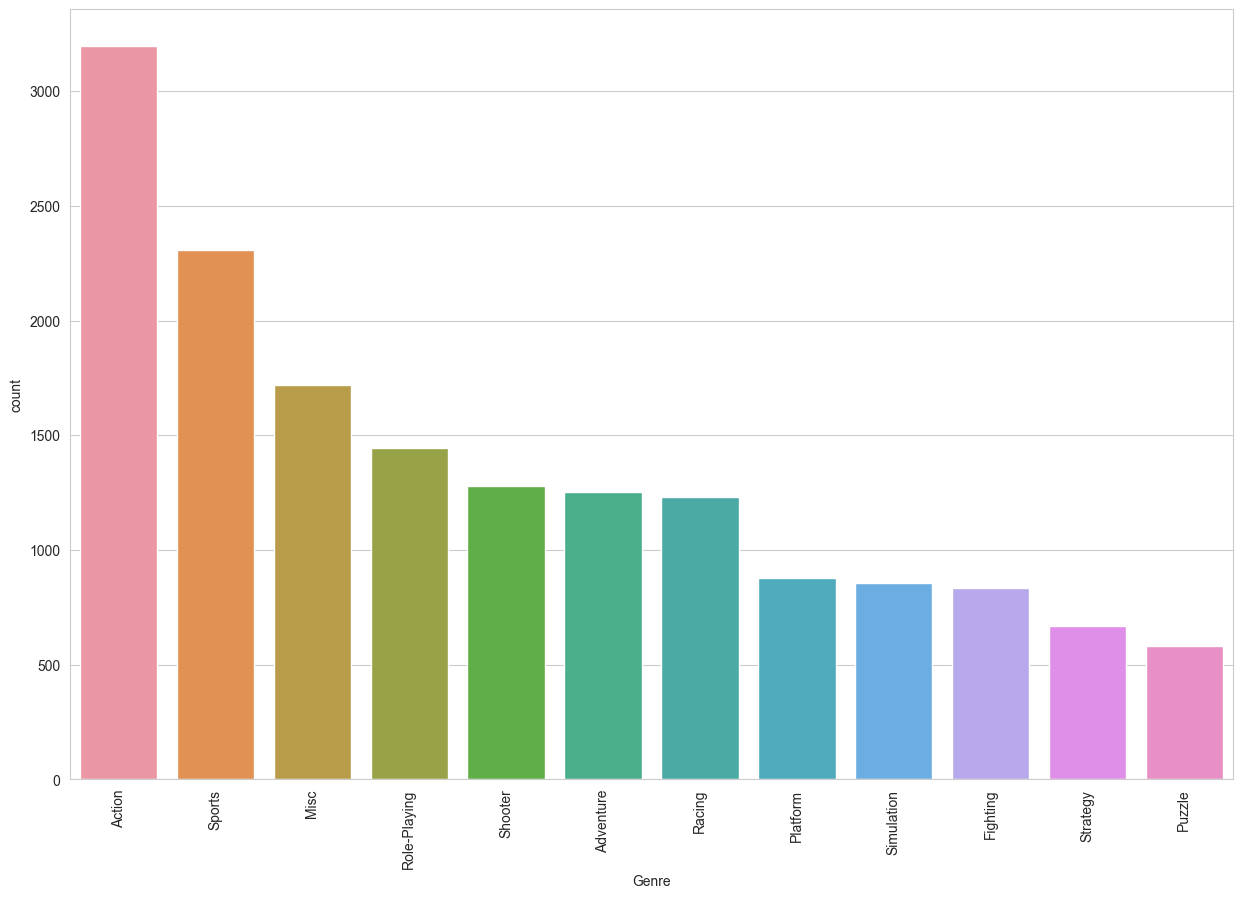

In [14]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=90)

## 2. Which year had the most game release?

In [18]:
data.groupby(by=['Year'])['Name'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

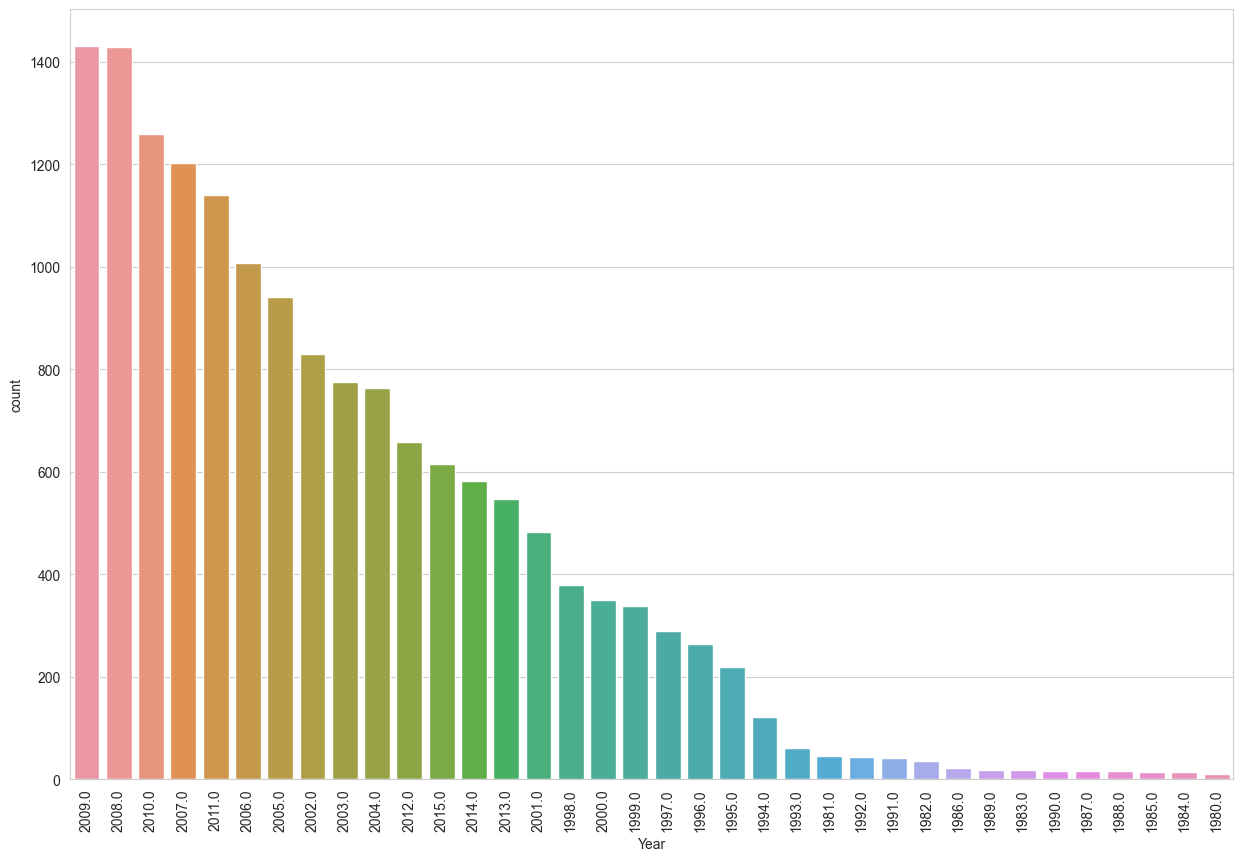

In [16]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=data, order = data.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)